In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.datasets as dataset
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from collections import Counter

In [2]:
from clusterization import vbgmm
from clusterization import variational_lmm
reload(variational_lmm)

<module 'clusterization.variational_lmm' from 'clusterization/variational_lmm.pyc'>

# GMM

In [3]:
data, y = make_blobs(n_samples=1000, centers=3, n_features=2)
#dataset.make_moons(n_samples=100, shuffle=False, noise=None, random_state=None)

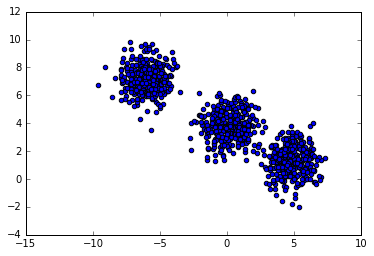

In [956]:
plt.scatter(data[:,0], data[:,1]);

In [813]:
m_0 = np.zeros(2)
mu_0 = 1.
b_0 = 1.
inv_W_0 = np.identity(2)
alpha_0 = np.array([1.] * 10) 
m_k = data[np.random.randint(data.shape[0], size=10)]
b_k = np.array([1.] * 10)
W_k = np.repeat(np.identity(2)[None,:,:], 10, axis=0)
mu_k = np.array([1.] * 10)
alpha_k = np.array([1.] * 10) 
R_k = np.repeat(np.array([1 / 10.] * 10)[None,:], data.shape[0], axis=0)

In [814]:
gmm = vbgmm.VBGMM(data, m_0, b_0, inv_W_0, mu_0, alpha_0, m_k, b_k, W_k, mu_k, alpha_k, R_k)

In [819]:
gmm.VariationalUpdates(2)

0


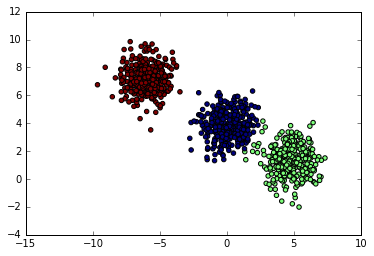

In [820]:
plt.scatter(data[:,0], data[:,1], c=np.argmax(gmm.R_k, axis=1));

In [146]:
weights = gmm.R_k

In [147]:
Y = data[:,1]

In [148]:
beta_mu_0 = np.zeros(2)
beta_sigma_0 = 10. * np.identity(2)
a_0 = 10.
b_0 = 10.
alpha_0 = np.array([5.] * 10)
R_k = weights
X = np.vstack((data[:,0], np.array([1.] * data.shape[0]))).T
Y = data[:,1]
reg = variational_lmm.VBLMM(X, Y, R_k, beta_mu_0, beta_sigma_0, a_0, b_0, alpha_0)

In [152]:
reg.VariationalUpdate(2)

In [153]:
labels = np.argmax(reg.R_k, axis=1)
clusters_number = np.unique(labels).shape[0]
print(clusters_number)
ctr = Counter(labels.ravel())
first_most_common_value, its_frequence = ctr.most_common(1)[0]
second_most_common_value, its_frequency = ctr.most_common(2)[1]

1


IndexError: list index out of range

# Кластеризация по направлению

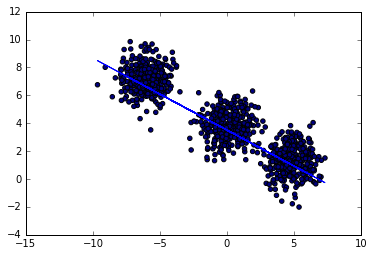

In [157]:
plt.scatter(data[:,0], data[:,1], c=np.argmax(reg.R_k, axis=1))
plt.scatter(X[:,0], X.dot(reg.beta_mu_k[first_most_common_value,:].T), c=np.argmax(reg.R_k, axis=1))
plt.scatter(X[:,0], X.dot(reg.beta_mu_k[second_most_common_value,:].T), c=np.argmax(reg.R_k, axis=1))

# Более сложные примеры кластеризации по направлению

In [696]:
x = np.linspace(-100., 100., 20)
X = np.vstack((x, np.array([1.] * x.shape[0]))).T
y = (x > 0) * (-2. * x + 1) + (x <= 0) * (4. * x + 1)

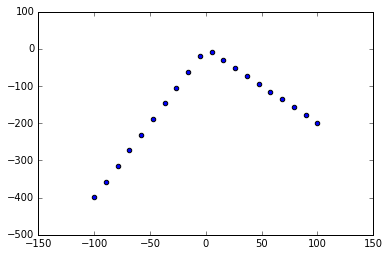

In [697]:
plt.scatter(x, y);

In [698]:
beta_mu_0 = np.array([1., 0.])
beta_sigma_0 = 10. * np.identity(2)
a_0 = 10.
b_0 = 10.
alpha_0 = np.array([1.] * 30)
R_k = np.random.dirichlet(alpha_0, x.shape[0])
Y = y
reg = variational_lmm.VBLMM(X, Y, R_k, beta_mu_0, beta_sigma_0, a_0, b_0, alpha_0)

In [699]:
reg.VariationalUpdate(1)

In [700]:
labels = np.argmax(reg.R_k, axis=1)
clusters_number = np.unique(labels).shape[0]
print(clusters_number)
ctr = Counter(labels.ravel())
first_most_common_value, its_frequence = ctr.most_common(1)[0]
second_most_common_value, its_frequency = ctr.most_common(2)[1]
third_most_common_value, its_frequency = ctr.most_common(3)[2]

3


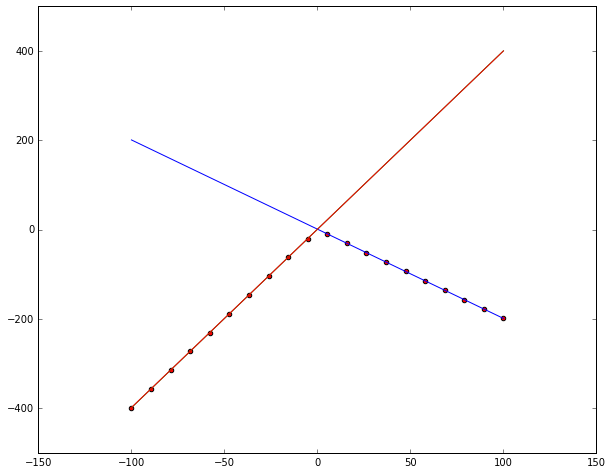

In [701]:
plt.figure(figsize=(10, 8))
plt.scatter(x, y, c='red')
for i in ctr.most_common(10):
    plt.plot(X[:,0], X.dot(reg.beta_mu_k[i[0],:].T))

    
#plt.plot(X[:,0], X.dot(reg.beta_mu_k[second_most_common_value,:].T))
#plt.plot(X[:,0], X.dot(reg.beta_mu_k[third_most_common_value,:].T))

In [4]:
x = np.linspace(-100., 100., 20)
y = np.hstack((2 * x + 3, 2 * x + 100))
x = np.hstack((x, x))
X = np.vstack((x, np.array([1.] * x.shape[0]))).T

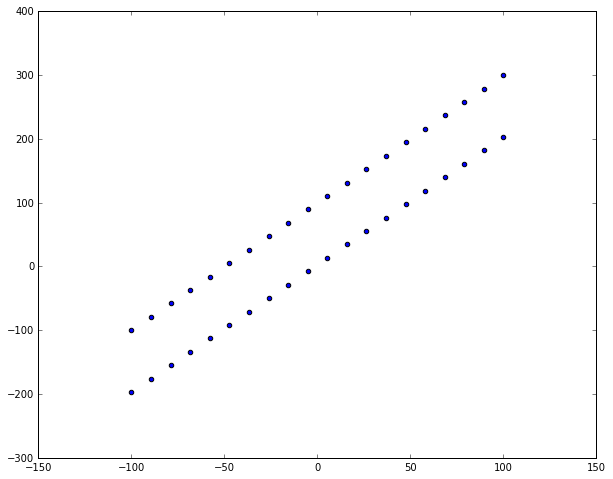

In [5]:
plt.figure(figsize=(10, 8))
plt.scatter(x, y);

In [684]:
beta_mu_0 = np.array([0., 1.])
beta_sigma_0 = 10. * np.identity(2)
a_0 = 10.
b_0 = 10.
alpha_0 = np.array([1.] * 30)
R_k = np.random.dirichlet(alpha_0, x.shape[0])
Y = y
reg = variational_lmm.VBLMM(X, Y, R_k, beta_mu_0, beta_sigma_0, a_0, b_0, alpha_0)

In [689]:
reg.VariationalUpdate(4)

2


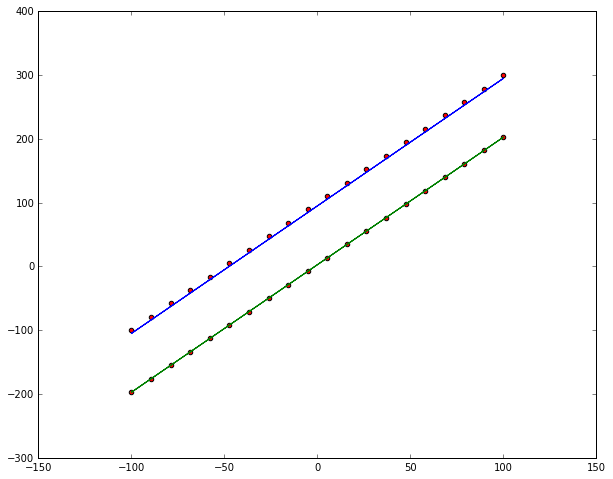

In [690]:
labels = np.argmax(reg.R_k, axis=1)
clusters_number = np.unique(labels).shape[0]
print(clusters_number)
ctr = Counter(labels.ravel())
plt.figure(figsize=(10, 8))
plt.scatter(x, y, c='red')
for i in ctr.most_common(10):
    plt.plot(X[:,0], X.dot(reg.beta_mu_k[i[0],:].T))


In [951]:
x = np.linspace(-10., 10., 20)
y = np.hstack((x ** 2 + 50, - x ** 2))
X_test = np.vstack((x, x ** 2, np.array([1.] * x.shape[0]))).T
x = np.hstack((x, x))
X = np.vstack((x, x ** 2, np.array([1.] * x.shape[0]))).T


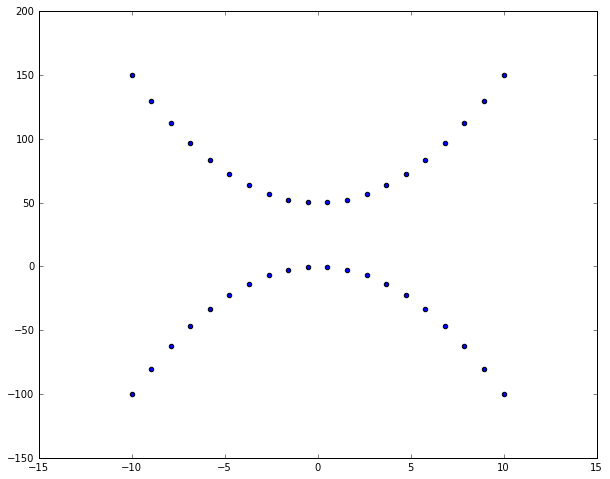

In [952]:
plt.figure(figsize=(10, 8))
plt.scatter(x, y);
#parabals_ground_trough

In [843]:
beta_mu_0 = np.array([0., 0., 1.])
beta_sigma_0 = 10. * np.identity(3)
a_0 = 1.
b_0 = 1.
alpha_0 = np.array([1.] * 30)
R_k = np.random.dirichlet(alpha_0, x.shape[0])
Y = y
reg = variational_lmm.VBLMM(X, Y, R_k, beta_mu_0, beta_sigma_0, a_0, b_0, alpha_0)

In [844]:
reg.VariationalUpdate(5)

2


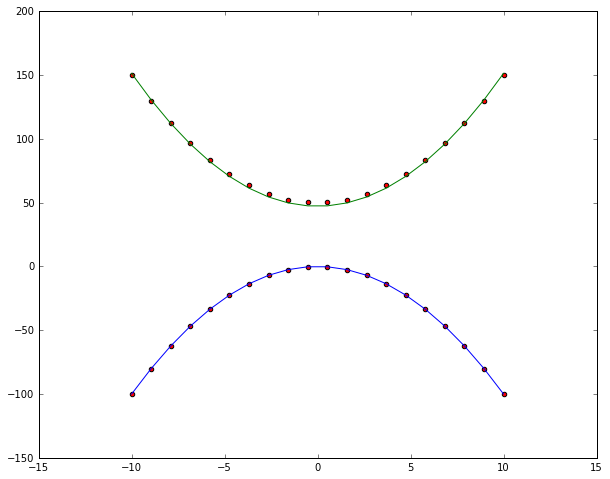

In [848]:
labels = np.argmax(reg.R_k, axis=1)
clusters_number = np.unique(labels).shape[0]
print(clusters_number)
ctr = Counter(labels.ravel())
plt.figure(figsize=(10, 8))
plt.scatter(x, y, c='red')
for i in ctr.most_common(10):
    plt.plot(X_test[:,0], X_test.dot(reg.beta_mu_k[i[0],:].T))


In [859]:
x = np.linspace(-10., 10., 20)
y = np.hstack((x ** 2 + 250 + x ** 3, - x ** 2 + x))
X_test = np.vstack((x, x ** 2, np.array([1.] * x.shape[0]))).T
x = np.hstack((x, x))
X = np.vstack((x, x ** 2, np.array([1.] * x.shape[0]))).T

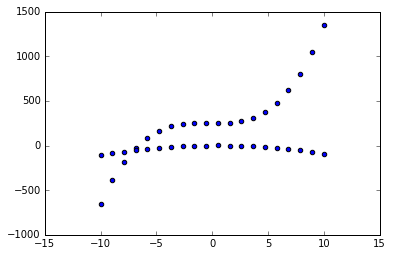

In [860]:
plt.scatter(x, y)

In [870]:
beta_mu_0 = np.array([0., 0., 1.])
beta_sigma_0 = 10. * np.identity(3)
a_0 = 1.
b_0 = 1.
alpha_0 = np.array([1.] * 30)
R_k = np.random.dirichlet(alpha_0, x.shape[0])
Y = y
reg = variational_lmm.VBLMM(X, Y, R_k, beta_mu_0, beta_sigma_0, a_0, b_0, alpha_0)

In [881]:
reg.VariationalUpdate(1)

3


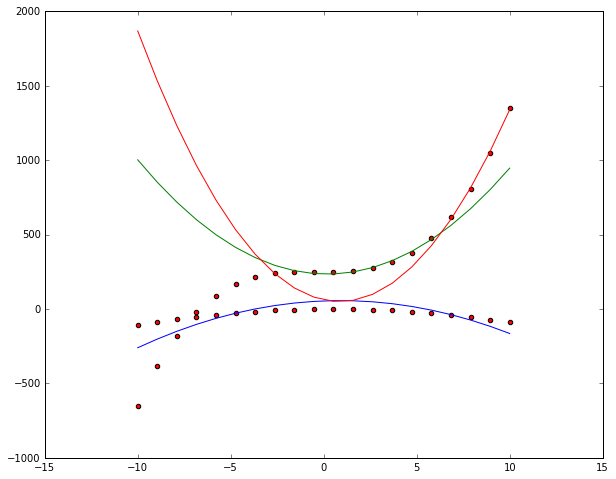

In [882]:
labels = np.argmax(reg.R_k, axis=1)
clusters_number = np.unique(labels).shape[0]
print(clusters_number)
ctr = Counter(labels.ravel())
plt.figure(figsize=(10, 8))
plt.scatter(x, y, c='red')
for i in ctr.most_common(10):
    plt.plot(X_test[:,0], X_test.dot(reg.beta_mu_k[i[0],:].T))
